In [1]:
import sys
sys.path.append('/Users/Sabatini Lab/GitHub/mouse_bandit/data_preprocessing_code')
sys.path.append('/Users/Sabatini Lab/GitHub/mouse_bandit')
#import support_functions as sf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy as sp
#import bandit_preprocessing as bp
import sklearn.linear_model
from sklearn import discriminant_analysis
from sklearn import model_selection
from sklearn import tree as Tree
import sklearn.tree
import sys
import os
%matplotlib inline

In [ ]:
data = pd.read_csv('/Users/celia/Desktop/0.1opto_trials_9010_high.csv',index_col=0)


In [ ]:
data.head(10)

In [ ]:
np.unique(data['Mouse ID'])

In [ ]:
data_SOM42 = data[data['Mouse ID'] == 'SOM42']
data_SOM41 = data[data['Mouse ID'] == 'SOM41']
data_SOM44 = data[data['Mouse ID'] == 'SOM44']
data_SOM45 = data[data['Mouse ID'] == 'SOM45']
#data_PV30 = data[data['Mouse ID'] == 'PV30']

add = [data_SOM44, data_SOM45]

control = pd.concat(add)


#for c in np.unique(data['Session ID'].values):
    #control.append(data_PV30[data_PV30['Session ID'] == c])
    #control.append(data_SOM42[data_SOM42['Session ID'] == c])
 #   control.append(data_SOM44[data_SOM44['Session ID'] == c])
  #  control.append(data_SOM45[data_SOM45['Session ID'] == c])
    #control.append(data_SOM41[data_SOM41['Session ID'] == c])

In [2]:
data = pd.read_csv('/Users/celia/Desktop/control.csv',index_col=0)


In [3]:
control=data

In [ ]:
switch_laser_rew1

In [ ]:
control.loc[switch_laser_rew1]

In [12]:
switch_laser_rew1 = control[((control['Laser'] == 1) & (control['Reward'] == 1)) ].index.values

L = 15
paralaser_rew1 = np.zeros((switch_laser_rew1.shape[0],(L*2)+1))

for k,point in enumerate(switch_laser_rew1):
        try:
            control.loc[point+L]['Trial'] & control.loc[point-L]['Trial']
            if control.loc[point]['Trial'] + L != control.loc[point+L]['Trial']:
                paralaser_rew1[k,:] = 'NaN'
            elif control.loc[point]['Trial'] - L != control.loc[point-L]['Trial']:
                paralaser_rew1[k,:] = 'NaN'
            else:
                paralaser_rew1[k,:] = control.loc[point-L:point+L]['Switch']
        except KeyError:
            paralaser_rew1[k,:] = 'NaN'
    #elif control.loc[point]['Trial'] <15: 
    #    paralaser_rew1[k,:] = 'NaN'
    
num_errors_rew1 = np.sum(np.isnan(paralaser_rew1))/(2*L+1)

In [ ]:
num_errors_rew1

In [ ]:
control.loc[point+L]['Trial']

In [ ]:
k_val=[]; point_val=[]
for k,point in enumerate(switch_laser_rew1):
    k_val.append(k)
    point_val.append(point)

In [ ]:
point_val

In [5]:
switch_laser_norew1 = control[((control['Laser'] == 1) & (control['Reward'] == 0)) ].index.values

paralaser_norew1 = np.zeros((switch_laser_norew1.shape[0],L*2+1))

for j,point in enumerate(switch_laser_norew1):
        try:
            control.loc[point+L]['Trial'] & control.loc[point-L]['Trial']
            if control.loc[point]['Trial'] + L != control.loc[point+L]['Trial']:
                paralaser_norew1[j,:] = 'NaN'
            elif control.loc[point]['Trial'] - L != control.loc[point-L]['Trial']:
                paralaser_norew1[j,:] = 'NaN'
            else:
                paralaser_norew1[j,:] = control.loc[point-L:point+L]['Switch']
        except KeyError:
            paralaser_rew1[j,:] = 'NaN'
    #elif control.loc[point]['Trial'] <15: 
    #    paralaser_rew1[k,:] = 'NaN'
    
num_errors_norew1 = np.sum(np.isnan(paralaser_norew1))/(2*L+1)

In [ ]:
np.set_printoptions(threshold=np.inf)

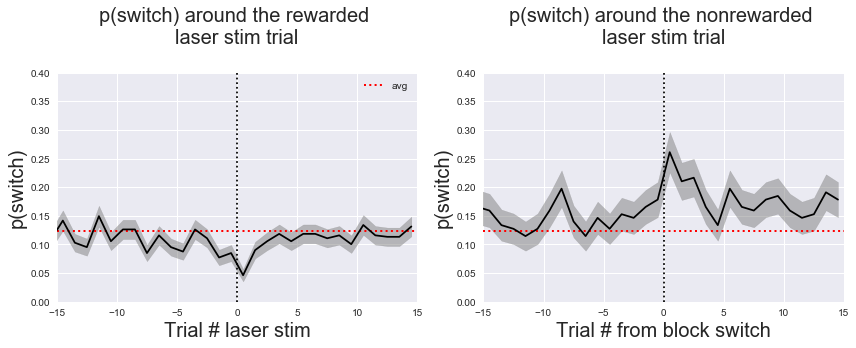

In [6]:
u = np.nanmean(paralaser_rew1, axis=0)
s = np.nanstd(paralaser_rew1, axis=0)
SE = s/np.sqrt(paralaser_rew1.shape[0]-num_errors_rew1)
plt.figure(figsize=(12,5))

plt.subplot(121)
plt.plot(np.arange(-1*L-.5,L+.5),u,color='black')
plt.fill_between(np.arange(-1*L-.5,L+.5),u+SE,u-SE,color='grey',alpha=0.5)
plt.vlines(x=0,ymin=0,ymax=0.5,color='black',linestyle='dotted')
plt.hlines(control['Switch'].mean(axis=0),xmin=-1*L,xmax=L+10,color='red',linestyle='dotted',label='avg',linewidth=2)
plt.legend(loc='upper right')
plt.xlabel('Trial # laser stim',fontsize=20)
plt.ylabel('p(switch)',fontsize=20)
plt.title('p(switch) around the rewarded \nlaser stim trial',fontsize=20,x=0.5,y=1.1)
plt.xlim(-1*L,L)
plt.ylim(0,0.4)

plt.subplot(122)
u = np.nanmean(paralaser_norew1, axis=0)
s = np.nanstd(paralaser_norew1, axis=0)
SE = s/np.sqrt(switch_laser_norew1.shape[0]-num_errors_norew1)
plt.plot(np.arange(-1*L-.5,L+.5),u,color='black')
plt.fill_between(np.arange(-1*L-.5,L+.5),u+SE,u-SE,color='grey',alpha=0.5)
plt.vlines(x=0,ymin=0,ymax=1,color='black',linestyle='dotted')
plt.hlines(control['Switch'].mean(),xmin=-1*L,xmax=L+10,color='red',linestyle='dotted',label='avg',linewidth=2)
plt.xlabel('Trial # from block switch',fontsize=20)
plt.ylabel('p(switch)',fontsize=20)
plt.title('p(switch) around the nonrewarded \nlaser stim trial',fontsize=20,x=0.5,y=1.1)
plt.xlim(-1*L,L)
plt.ylim(0,0.4)

plt.tight_layout()

In [ ]:
u = np.nanmean(paralaser_rew1, axis=0)
s = np.nanstd(paralaser_rew1, axis=0)
SE = s/np.sqrt(paralaser_rew1.shape[0]-num_errors_rew1)
plt.figure(figsize=(12,5))


plt.subplot(121)
plt.plot(np.arange(-1*L,L),u,color='black')
plt.fill_between(np.arange(-1*L,L),u+SE,u-SE,color='grey',alpha=0.5)
plt.vlines(x=0,ymin=0,ymax=0.5,color='black',linestyle='dotted')
plt.hlines(control['Switch'].mean(axis=0),xmin=-1*L,xmax=L+10,color='red',linestyle='dotted',label='avg',linewidth=2)
plt.legend(loc='upper right')
plt.xlabel('Trial # laser stim',fontsize=20)
plt.ylabel('p(switch)',fontsize=20)
plt.title('p(switch) around the rewarded \nlaser stim trial',fontsize=20,x=0.5,y=1.1)
plt.xlim(-1*L,L)
plt.ylim(0,0.4)


plt.subplot(122)
u = np.nanmean(paralaser_norew1, axis=0)
s = np.nanstd(paralaser_norew1, axis=0)
SE = s/np.sqrt(switch_laser_norew1.shape[0]-num_errors_norew1)
plt.plot(np.arange(-1*L,L),u,color='black')
plt.fill_between(np.arange(-1*L,L),u+SE,u-SE,color='grey',alpha=0.5)
plt.vlines(x=0,ymin=0,ymax=1,color='black',linestyle='dotted')
plt.hlines(control['Switch'].mean(),xmin=-1*L,xmax=L+10,color='red',linestyle='dotted',label='avg',linewidth=2)
plt.xlabel('Trial # from block switch',fontsize=20)
plt.ylabel('p(switch)',fontsize=20)
plt.title('p(switch) around the nonrewarded \nlaser stim trial',fontsize=20,x=0.5,y=1.1)
plt.xlim(-1*L,L)
plt.ylim(0,0.4)

plt.tight_layout()

In [ ]:
control.iloc[-10:20]['Switch']

In [ ]:
switch_laser_rew = data[((data['Laser'] == 1) & (data['Reward'] == 1)) ].index.values

L = 15
paralaser_rew = np.zeros((switch_laser_rew.shape[0],L*2))

for i,point in enumerate(switch_laser_rew):

    paralaser_rew[i,:] = data.iloc[point-L:point+L]['Switch']